In [1]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.2 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pingouin
from scipy.stats import chi2_contingency

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data= pd.read_csv("/content/drive/MyDrive/week 2 Task/cleaned_data.csv")

In [5]:
data['Total curricular units (credited)'] = data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)']
data['Total curricular units (enrolled)'] = data['Curricular units 1st sem (enrolled)']	+ data['Curricular units 2nd sem (enrolled)']
data['Total curricular units (evaluations)'] = data['Curricular units 1st sem (evaluations)']	+ data['Curricular units 2nd sem (evaluations)']
data['Total curricular units (approved)'] = data['Curricular units 1st sem (approved)']	+ data['Curricular units 2nd sem (approved)']
data['Average curricular units grade'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)'])/2
data['Total curricular units (without evaluations)'] = data['Curricular units 1st sem (without evaluations)'] + data['Curricular units 2nd sem (without evaluations)']

In [6]:
# numeric = ['Age at enrollment','Average curricular units grade', 'Unemployment rate','Inflation rate','GDP','Previous qualification (grade)','Admission grade','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']
category =  ['Daytime/evening attendance','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','International','Marital status','Target','Previous qualification','Nationality','Course','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)']
for cat in category:
    data[f'{cat}'] = data[f'{cat}'].astype(str)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 72 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Marital status                                          4424 non-null   object 
 1   Application mode                                        4424 non-null   int64  
 2   Application order                                       4424 non-null   int64  
 3   Course                                                  4424 non-null   object 
 4   Daytime/evening attendance                              4424 non-null   object 
 5   Previous qualification                                  4424 non-null   object 
 6   Previous qualification (grade)                          4424 non-null   float64
 7   Nationality                                             4424 non-null   object 
 8   Mother's qualification                

# Univariate Analysis

#  histograms and box plots for numerical variables

In [8]:
# Visualizing numerical variables with histograms
numeric = ['Average curricular units grade', 'Admission grade','Age at enrollment','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']
for num in numeric:
    fig = px.histogram(data, x=num, title= f"{num} Distribution",  nbins=50,
  width=600,
  height=400,)
    fig.show()

In [9]:
# Visualizing numerical variables with box plot
for num in numeric:
    fig = px.box(data, x=num, title= f"{num} Distribution",
  width=600,
  height=400,)
    fig.show()

In [10]:
# Descriptive statistics for numerical variables
data.describe()

Application mode  Application order  Previous qualification (grade)  \
count       4424.000000        4424.000000                     4424.000000   
mean          18.669078           1.727396                      132.613314   
std           17.484682           1.311632                       13.188332   
min            1.000000           0.000000                       95.000000   
25%            1.000000           1.000000                      125.000000   
50%           17.000000           1.000000                      133.100000   
75%           39.000000           2.000000                      140.000000   
max           57.000000           7.000000                      190.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                19.561935               22.275316            10.960895   
std                 15.603186               15.343108            26.418253   
min                  1.000000                1.000000             0.000000   
25%                  2.000000                3.000000             4.000000   
50%                 19.000000               19.000000             5.000000   
75%                 37.000000               37.000000             9.000000   
max                 44.000000               44.000000           194.000000   

       Father's occupation  Admission grade  Age at enrollment  \
count          4424.000000      4424.000000        4424.000000   
mean             11.032324       126.978119          23.265145   
std              25.263040        14.482001           7.587816   
min               0.000000        95.000000          17.000000   
25%               4.000000       117.900000          19.000000   
50%               7.000000       126.100000          20.000000   
75%               9.000000       134.800000          25.000000   
max             195.000000       190.000000          70.000000   

       Curricular units 1st sem (grade)  ...  Inflation rate_encoded  \
count                       4424.000000  ...            4.424000e+03   
mean                          10.640848  ...            1.525804e-16   
std                            4.843666  ...            1.000113e+00   
min                            0.000000  ...           -1.466871e+00   
25%                           11.000000  ...           -6.712423e-01   
50%                           12.290000  ...            1.243865e-01   
75%                           13.400000  ...            9.923451e-01   
max                           18.880000  ...            1.787974e+00   

        GDP_encoded  Curricular units 1st sem (grade)_encoded  \
count  4.424000e+03                              4.424000e+03   
mean   2.650080e-17                             -1.413376e-16   
std    1.000113e+00                              1.000113e+00   
min   -1.789667e+00                             -2.197107e+00   
25%   -7.498721e-01                              7.415725e-02   
50%    1.401217e-01                              3.405145e-01   
75%    7.877904e-01                              5.697057e-01   
max    1.545607e+00                              1.701208e+00   

       Curricular units 2nd sem (grade)_encoded  \
count                              4.424000e+03   
mean                              -1.718537e-16   
std                                1.000113e+00   
min                               -1.963484e+00   
25%                                9.976505e-02   
50%                                3.780637e-01   
75%                                5.949447e-01   
max                                1.600659e+00   

       Total curricular units (credited)  Total curricular units (enrolled)  \
count                        4424.000000                        4424.000000   
mean                            1.251808                          12.502712   
std                             4.220239                           4.60882

In [11]:
# Descriptive statistics for Categorical variables
data.describe(include='object')

Marital status Course Daytime/evening attendance  \
count            4424   4424                       4424   
unique              6     17                          2   
top                 1   9500                          1   
freq             3919    766                       3941   

       Previous qualification Nationality Displaced Educational special needs  \
count                    4424        4424      4424                      4424   
unique                     17          21         2                         2   
top                         1           1         1                         0   
freq                     3717        4314      2426                      4373   

       Debtor Tuition fees up to date Gender  ...  \
count    4424                    4424   4424  ...   
unique      2                       2      2  ...   
top         0                       1      0  ...   
freq     3921                    3896   2868  ...   

       Curricular units 1st sem (enrolled)  \
count                                 4424   
unique                                  23   
top                                      6   
freq                                  1910   

       Curricular units 1st sem (evaluations)  \
count                                    4424   
unique                                     35   
top                                         8   
freq                                      791   

       Curricular units 1st sem (approved)  \
count                                 4424   
unique                                  23   
top                                      6   
freq                                  1171   

       Curricular units 1st sem (without evaluations)  \
count                                            4424   
unique                                             11   
top                                                 0   
freq                                             4130   

       Curricular units 2nd sem (credited)  \
count                                 4424   
unique                                  19   
top                                      0   
freq                                  3894   

       Curricular units 2nd sem (enrolled)  \
count                                 4424   
unique                                  22   
top                                      6   
freq                                  1913   

       Curricular units 2nd sem (evaluations)  \
count                                    4424   
unique                                     30   
top                                         8   
freq                                      792   

       Curricular units 2nd sem (approved)  \
count                                 4424   
unique                                  20   
top                                      6   
freq                                   965   

       Curricular units 2nd sem (without evaluations)    Target  
count                                            4424      4424  
unique                                             10         3  
top                                                 0  Graduate  
freq                                             4142      2209  

[4 rows x 23 columns]

# Bar Chart for Categorical Variables

In [12]:
# Bar Chart for Categorical variables
for cat in category:
    sort = data[f'{cat}'].sort_values()
    sort

In [13]:
ap  = []
for i in range(10000):
    ap.append(i)

for cat in category:
    fig = px.bar(data, x=cat, title= f"{cat} Distribution", category_orders=ap,
                       width=600,
                       height=400,)
    fig.show()

# Bivariate Analysis

## Scatter plots for pairs of numerical variables

In [14]:
# 'Average curricular units grade', 'Admission grade','Age at enrollment','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'
fig = px.scatter(data, x='Average curricular units grade', y='Admission grade_encoded',  width=600,
  height=400,)
fig.update_layout(
        title= "Average curricular units grade vs Admission grade",
        xaxis_title= 'Average curricular units grade',
        yaxis_title= "Admission grade")
fig.show()

In [15]:
fig = px.scatter(data, x='Curricular units 1st sem (grade)',y='Curricular units 2nd sem (grade)',  width=600,
  height=400,)
fig.update_layout(
        title= 'Curricular units 1st sem (grade) vs Curricular units 2nd sem (grade)',
        xaxis_title= 'Curricular units 1st sem (grade)',
        yaxis_title= "Curricular units 2nd sem (grade)")
fig.show()

## Box plots of numerical variables grouped by categorical variables

In [16]:
for cat in category:
    for num in numeric:
        fig = px.box(data, x=num, title= f"{num} Distribution", color=cat,
                     width=600,
                     height=400,)
        fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
for num in numeric:
    fig = px.box(data, x=num, title= f"{num} Distribution", color='Target',
                 width=600,
                 height=400,)
    fig.show()

##  Perform and visualize correlation analysis

In [18]:
data[numeric].corr()

Average curricular units grade  \
Average curricular units grade                          1.000000   
Admission grade                                         0.077358   
Age at enrollment                                      -0.172489   
Curricular units 1st sem (grade)                        0.955271   
Curricular units 2nd sem (grade)                        0.961474   

                                  Admission grade  Age at enrollment  \
Average curricular units grade           0.077358          -0.172489   
Admission grade                          1.000000          -0.029915   
Age at enrollment                       -0.029915           1.000000   
Curricular units 1st sem (grade)         0.073862          -0.156623   
Curricular units 2nd sem (grade)         0.074412          -0.173420   

                                  Curricular units 1st sem (grade)  \
Average curricular units grade                            0.955271   
Admission grade                                           0.073862   
Age at enrollment                                        -0.156623   
Curricular units 1st sem (grade)                          1.000000   
Curricular units 2nd sem (grade)                          0.837172   

                                  Curricular units 2nd sem (grade)  
Average curricular units grade                            0.961474  
Admission grade                                           0.074412  
Age at enrollment                                        -0.173420  
Curricular units 1st sem (grade)                          0.837172  
Curricular units 2nd sem (grade)                          1.000000

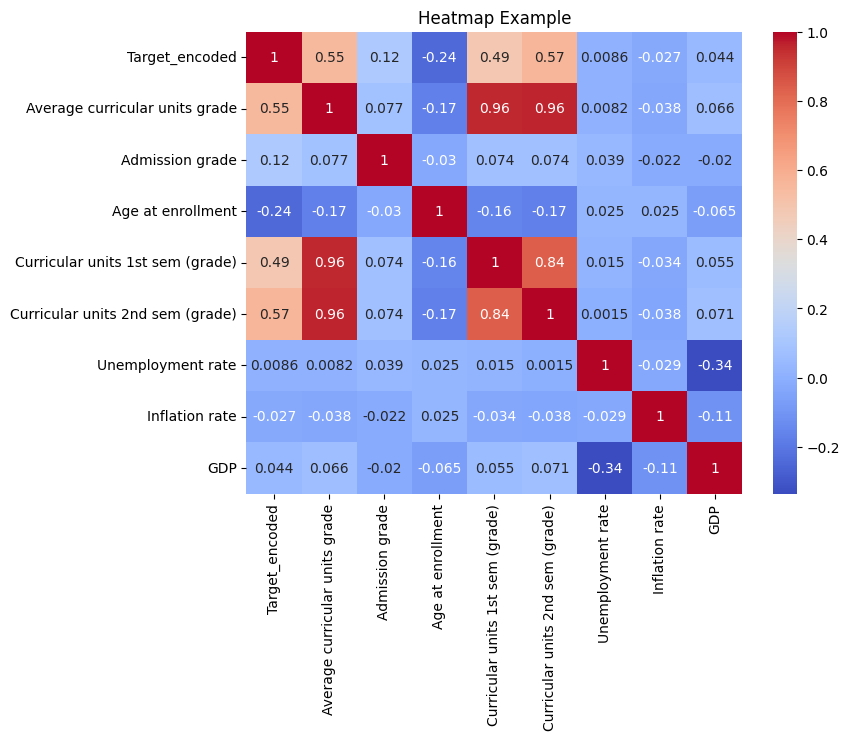

In [19]:
all_numeric = ['Target_encoded','Average curricular units grade', 'Admission grade','Age at enrollment','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Unemployment rate', 'Inflation rate', 'GDP']
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[all_numeric].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap Example')
plt.show()

# Conduct chi-square tests for categorical variables

# Target categories and Tuition fees up to date
Ho: Target categories and Tuition fees up to date are independent\
Ha: Target categories and Tuition fees up to date are not independent

In [20]:
# Target proportions
data['Target'].value_counts(normalize=True)

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

In [21]:
# Visualizing Target categories and Tuition fees up to date
fig = px.histogram(data, x='Target', title= "Target categories and Tuition fees up to date",  nbins=50,color='Tuition fees up to date',
  width=600,
  height=400,)
fig.show()

<Axes: xlabel='Tuition fees up to date'>

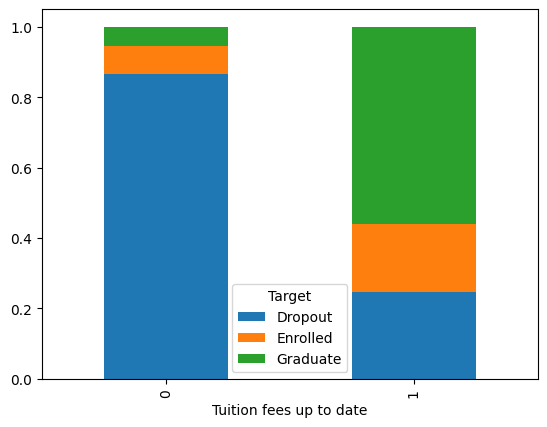

In [22]:
# Visualizing stacked bar of Target categories and Tuition fees up to date
props = data.groupby('Tuition fees up to date')['Target'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar',stacked=True)

In [23]:
alpha = 0.05
expected, observed, stats = pingouin.chi2_independence(data=data, x='Tuition fees up to date',y='Target')
print(stats[stats['test']=='pearson'])

      test  lambda        chi2  dof           pval    cramer  power
0  pearson     1.0  823.552724  2.0  1.471628e-179  0.431458    1.0


The p-value is less than a significant level of 0.05 so we reject the null hypothesis and conclude that the target categories and the Tuition fees up to date are not independent

# Target categories vs Displaced students

 Ho: Target categories and Displaced students are independent\
 Ha: Target categories and Displaced students are not independent

In [24]:
fig = px.histogram(data, x='Target', title= "Target categories and Displaced students",  nbins=50,color='Displaced',
  width=600,
  height=400,)
fig.show()

<Axes: xlabel='Displaced'>

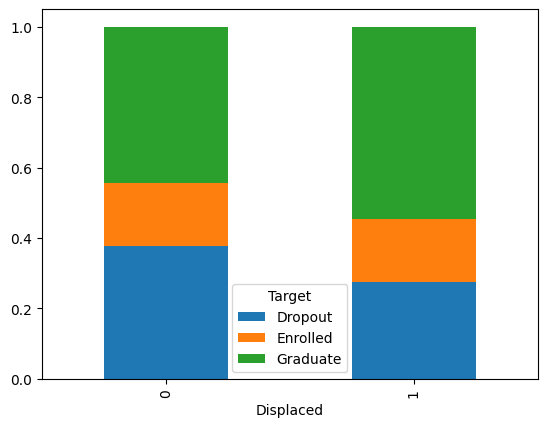

In [25]:
props = data.groupby('Displaced')['Target'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar',stacked=True)

In [26]:
alpha = 0.05
expected, observed, stats = pingouin.chi2_independence(data=data, x='Displaced',y='Target')
print(stats[stats['test']=='pearson'])

      test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  57.754195  2.0  2.876311e-13  0.114257    1.0


The p-value is less than a significant level of 0.05 so we reject the null hypothesis and conclude that the target categories and the Displaced students are not independent

 ## Multivariate Analysis

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Average curricular units grade_encoded'] = scaler.fit_transform(data['Average curricular units grade'].values.reshape(-1, 1))

In [28]:
multi_plot =  ['Average curricular units grade_encoded', 'Admission grade_encoded',
       'Age at enrollment_encoded', 'Curricular units 1st sem (grade)_encoded',
       'Curricular units 2nd sem (grade)_encoded', 'Unemployment rate_encoded',
       'Inflation rate_encoded', 'GDP_encoded']

In [29]:
# Create pair plots (scatter matrix)
sns.pairplot(data[multi_plot])
plt.show()

# Principal Component Analysis

In [30]:
from sklearn.decomposition import PCA
model = PCA()
pca = model.fit_transform(data[multi_plot])
pca_df = pd.DataFrame(data=pca, columns=data[multi_plot].columns)
sns.pairplot(pca_df)
plt.show()


In [31]:
pca_df_components = pd.DataFrame(data=model.components_, columns=data[multi_plot].columns)
pca_df_components

Average curricular units grade_encoded  Admission grade_encoded  \
0                               -0.583431                -0.069453   
1                                0.039114                 0.116986   
2                                0.060312                -0.513089   
3                                0.046353                -0.780910   
4                                0.066777                 0.329222   
5                                0.015808                 0.004654   
6                                0.017997                -0.000630   
7                               -0.804524                -0.000000   

   Age at enrollment_encoded  Curricular units 1st sem (grade)_encoded  \
0               1.538666e-01                                 -0.557784   
1               1.229428e-01                                  0.047473   
2               1.837693e-01                                  0.060645   
3               2.727351e-01                                  0.047737   
4               9.226797e-01                                  0.071611   
5              -3.919032e-02                                  0.016075   
6               1.344753e-02                                 -0.715383   
7               5.551115e-17                                  0.404360   

   Curricular units 2nd sem (grade)_encoded  Unemployment rate_encoded  \
0                                 -0.560536               4.161279e-03   
1                                  0.028211               6.742379e-01   
2                                  0.055172              -2.299343e-01   
3                                  0.041354               1.929558e-01   
4                                  0.056934              -1.299961e-01   
5                                  0.014294              -6.620697e-01   
6                                  0.698262               6.992267e-03   
7                                  0.435010              -4.770490e-18   

   Inflation rate_encoded   GDP_encoded  
0            3.937533e-02 -6.494787e-02  
1            1.567142e-01 -6.981860e-01  
2            7.950392e-01 -8.747390e-02  
3           -5.219080e-01 -6.117378e-03  
4           -4.259859e-02  9.344911e-02  
5           -2.599917e-01 -7.012830e-01  
6            2.163631e-03 -9.919187e-03  
7            5.204170e-18 -4.163336e-17

In [32]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(30, 20))
parallel_coordinates(data[category], 'Target', colormap='viridis')
plt.title('Parallel Coordinates Plot of Student Dropout Dataset')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.grid(True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
data.to_csv('updated_data.csv', index=False)